# 1 датасет. NASA - Nearest Earth Objects
## В космосе находится бесконечное количество объектов. Некоторые из них находятся ближе, чем мы думаем. Хотя мы можем думать, что расстояние в 70 000 км не может потенциально навредить нам, но в астрономических масштабах это очень малое расстояние и может нарушить многие природные явления. Таким образом, эти объекты/астероиды могут оказаться вредными. Следовательно, разумно знать, что нас окружает и что из этого может навредить нам. Таким образом, этот набор данных составляет список сертифицированных NASA астероидов, которые классифицируются как ближайшие к Земле объекты.
## В данном датасете объектами исследования являются околоземные объекты. В нём содержатся данные атрибуты: id, name, est_diameter_min, est_diameter_max, relative_velocity, miss_distance, orbiting_body, sentry_object, absolute_magnitude, hazardous. Цель создания данного датасета- научиться определять, опасен ли объект на орбите или же нет.


In [1]:
import pandas as pd 
df = pd.read_csv("C://Users//annal//aim//static//csv//neo_v2.csv")
print('количество колонок: ' + str(df.columns.size))  
print('колонки: ' + ', '.join(df.columns))

количество колонок: 10
колонки: id, name, est_diameter_min, est_diameter_max, relative_velocity, miss_distance, orbiting_body, sentry_object, absolute_magnitude, hazardous


## Получим сведения о пропущенных данных. Из вывода видно, что пропущенные данные не обнаружены.

In [2]:
# Количество пустых значений признаков
print(df.isnull().sum())

print()

# Есть ли пустые значения признаков
print(df.isnull().any())

print()

# Процент пустых значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f"{i} процент пустых значений: %{null_rate:.2f}")

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

id                    False
name                  False
est_diameter_min      False
est_diameter_max      False
relative_velocity     False
miss_distance         False
orbiting_body         False
sentry_object         False
absolute_magnitude    False
hazardous             False
dtype: bool



## На сайте в карточке датасета видно, что в колонках orbiting_body и sentry_object в каждой строке одинаковое значение. Это значит, что эти колонки не являются информативными и их можно убрать.

In [3]:
df = df.drop(columns=['orbiting_body'])
df = df.drop(columns=['sentry_object'])
print('количество колонок: ' + str(df.columns.size))  
print('колонки: ' + ', '.join(df.columns))

количество колонок: 8
колонки: id, name, est_diameter_min, est_diameter_max, relative_velocity, miss_distance, absolute_magnitude, hazardous


## При беглом осмотре данных, зашумлённости не обнаружила. Необходимо ознакомиться с данными о выбросах.

In [4]:
numeric_columns = ['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']
for column in numeric_columns:
    if pd.api.types.is_numeric_dtype(df[column]):  # Проверяем, является ли колонка числовой
        q1 = df[column].quantile(0.25)  # Находим 1-й квантиль (Q1)
        q3 = df[column].quantile(0.75)  # Находим 3-й квантиль (Q3)
        iqr = q3 - q1  # Вычисляем межквантильный размах (IQR)

        # Определяем границы для выбросов
        lower_bound = q1 - 1.5 * iqr  # Нижняя граница
        upper_bound = q3 + 1.5 * iqr  # Верхняя граница

        # Подсчитываем количество выбросов
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_count = outliers.shape[0]

        # Устраняем выбросы: заменяем значения ниже нижней границы на саму нижнюю границу, а выше верхней — на верхнюю
        df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

        print(f"Колонка {column}:")
        print(f"  Есть выбросы: {'Да' if outlier_count > 0 else 'Нет'}")
        print(f"  Количество выбросов: {outlier_count}")
        print(f"  Минимальное значение: {df[column].min()}")
        print(f"  Максимальное значение: {df[column].max()}")
        print(f"  1-й квантиль (Q1): {q1}")
        print(f"  3-й квантиль (Q3): {q3}\n")

Колонка est_diameter_min:
  Есть выбросы: Да
  Количество выбросов: 8306
  Минимальное значение: 0.0006089126
  Максимальное значение: 0.32962154705
  1-й квантиль (Q1): 0.0192555078
  3-й квантиль (Q3): 0.1434019235

Колонка est_diameter_max:
  Есть выбросы: Да
  Количество выбросов: 8306
  Минимальное значение: 0.00136157
  Максимальное значение: 0.7370561859
  1-й квантиль (Q1): 0.0430566244
  3-й квантиль (Q3): 0.320656449

Колонка relative_velocity:
  Есть выбросы: Да
  Количество выбросов: 1574
  Минимальное значение: 203.34643253
  Максимальное значение: 114380.48061454494
  1-й квантиль (Q1): 28619.02064490995
  3-й квантиль (Q3): 62923.60463276395

Колонка miss_distance:
  Есть выбросы: Нет
  Количество выбросов: 0
  Минимальное значение: 6745.532515957
  Максимальное значение: 74798651.4521972
  1-й квантиль (Q1): 17210820.23576468
  3-й квантиль (Q3): 56548996.45139917

Колонка absolute_magnitude:
  Есть выбросы: Да
  Количество выбросов: 101
  Минимальное значение: 14.8
  М

## Необходимо построить диаграммы для поиска зависимостей опасности от других колонок.

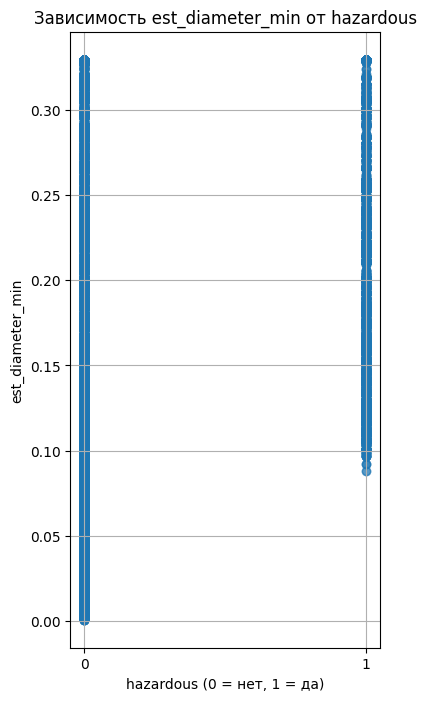

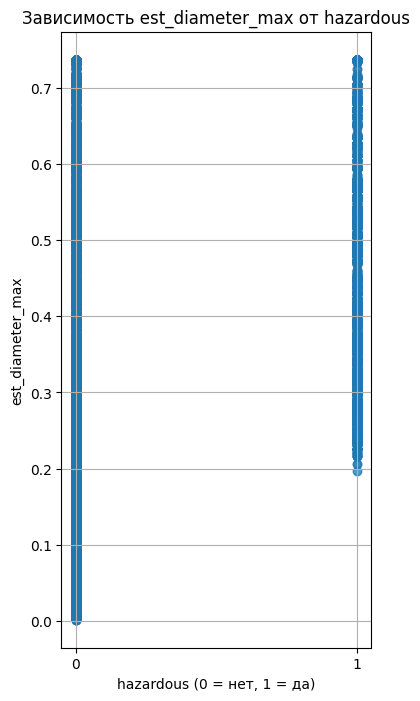

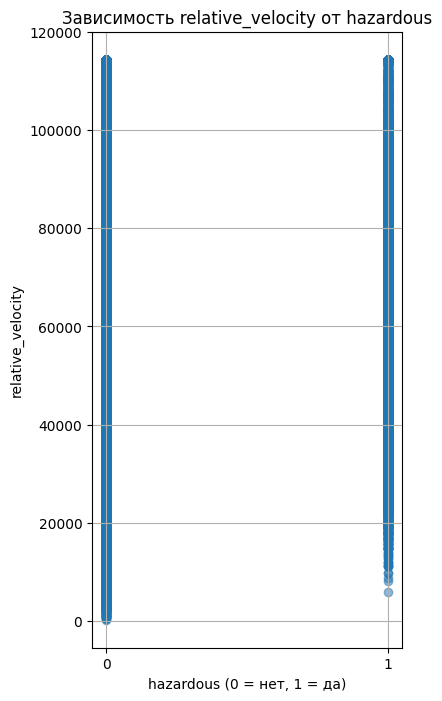

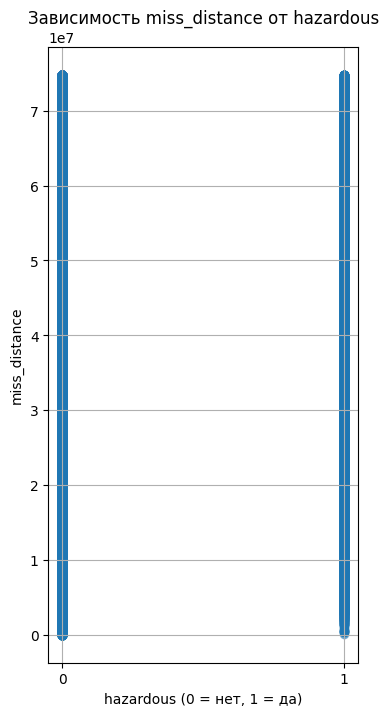

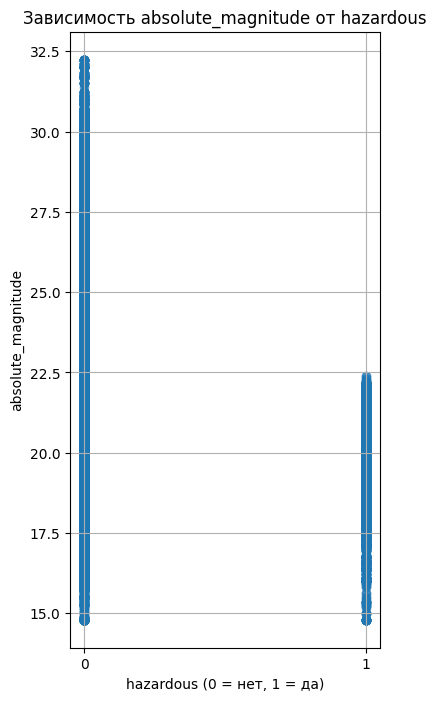

In [5]:
import matplotlib.pyplot as plt

# Список числовых колонок, для которых мы будем строить графики
numeric_columns = ['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']

# Создание диаграмм зависимости
for column in numeric_columns:
    plt.figure(figsize=(4, 8))  # Установка размера графика
    plt.scatter(df['hazardous'], df[column], alpha=0.5)  # Создаем диаграмму рассеяния
    plt.title(f'Зависимость {column} от hazardous')
    plt.xlabel('hazardous (0 = нет, 1 = да)')
    plt.ylabel(column)
    plt.xticks([0, 1])  # Установка меток по оси X
    plt.grid()  # Добавление сетки для удобства восприятия
    plt.show()  # Отображение графика

## Далее создадим выборки. Разбивать данные на классы стоит по критерию опасности, потому что это то, что будет предсказывать модель.

In [6]:
pip install scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.0 MB 1.9 MB/s eta 0:00:06
   ---- ----------------------------------- 1.3/11.0 MB 2.3 MB/s eta 0:00:05
   -------- ------------------------------- 2.4/11.0 MB 2.9 MB/s eta 0:00:03
   ----------- ---------------------------- 3.1/11.0 MB 3.2 MB/s eta 0:00:03
   --------------- ------------------------ 4.2/11.0 MB 3.5 MB/s eta 0:00:02
   ------------------ --------------------- 5.0/11.0 MB 3.6 MB/s eta 0:00:02
   --------------------- ------------------ 6.0/11.0 MB 3.8 MB/s eta 0:00:02
   ------------------------ --------------- 6.8/11.0 MB 3.8 MB/s eta 0:00:02
   --------------------------- ------------ 7.6/11.0 MB 3.9 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.0 MB 3.9 MB/s eta 0:00:01
   --------------------------------- ------ 9.2/11.0 MB 3.9 MB/s eta 0:00:01
   ----------

In [7]:
# Функция для создания выборок
from sklearn.model_selection import train_test_split

def split_stratified_into_train_val_test(
    df_input,
    stratify_colname="y",
    frac_train=0.6,
    frac_val=0.15,
    frac_test=0.25,
    random_state=None,
):
    """
    Splits a Pandas dataframe into three subsets (train, val, and test)
    following fractional ratios provided by the user, where each subset is
    stratified by the values in a specific column (that is, each subset has
    the same relative frequency of the values in the column). It performs this
    splitting by running train_test_split() twice.

    Parameters
    ----------
    df_input : Pandas dataframe
        Input dataframe to be split.
    stratify_colname : str
        The name of the column that will be used for stratification. Usually
        this column would be for the label.
    frac_train : float
    frac_val   : float
    frac_test  : float
        The ratios with which the dataframe will be split into train, val, and
        test data. The values should be expressed as float fractions and should
        sum to 1.0.
    random_state : int, None, or RandomStateInstance
        Value to be passed to train_test_split().

    Returns
    -------
    df_train, df_val, df_test :
        Dataframes containing the three splits.
    """

    if frac_train + frac_val + frac_test != 1.0:
        raise ValueError(
            "fractions %f, %f, %f do not add up to 1.0"
            % (frac_train, frac_val, frac_test)
        )

    if stratify_colname not in df_input.columns:
        raise ValueError("%s is not a column in the dataframe" % (stratify_colname))

    X = df_input  # Contains all columns.
    y = df_input[
        [stratify_colname]
    ]  # Dataframe of just the column on which to stratify.

    # Split original dataframe into train and temp dataframes.
    df_train, df_temp, y_train, y_temp = train_test_split(
        X, y, stratify=y, test_size=(1.0 - frac_train), random_state=random_state
    )

    # Split the temp dataframe into val and test dataframes.
    relative_frac_test = frac_test / (frac_val + frac_test)
    df_val, df_test, y_val, y_test = train_test_split(
        df_temp,
        y_temp,
        stratify=y_temp,
        test_size=relative_frac_test,
        random_state=random_state,
    )

    assert len(df_input) == len(df_train) + len(df_val) + len(df_test)

    return df_train, df_val, df_test

hazardous
False    81996
True      8840
Name: count, dtype: int64

Обучающая выборка:  (54501, 6)
hazardous
False    49197
True      5304
Name: count, dtype: int64


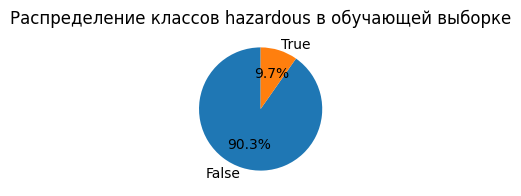

Контрольная выборка:  (18167, 6)
hazardous
False    16399
True      1768
Name: count, dtype: int64


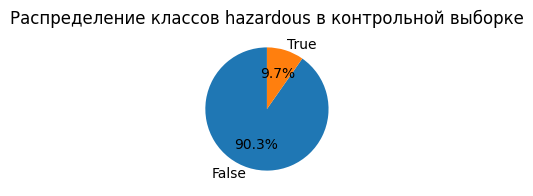

Тестовая выборка:  (18168, 6)
hazardous
False    16400
True      1768
Name: count, dtype: int64


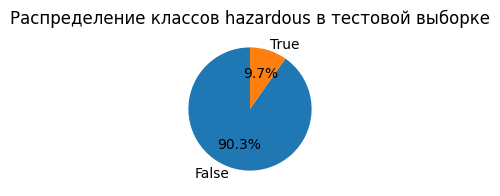

In [8]:
# Вывод распределения количества наблюдений по меткам (классам)
print(df.hazardous.value_counts())
print()


data = df[['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude', 'hazardous']].copy()

df_train, df_val, df_test = split_stratified_into_train_val_test(
   data, stratify_colname="hazardous", frac_train=0.60, frac_val=0.20, frac_test=0.20
)

print("Обучающая выборка: ", df_train.shape)
print(df_train.hazardous.value_counts())
hazardous_counts = df_train['hazardous'].value_counts()
plt.figure(figsize=(2, 2))# Установка размера графика
plt.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%', startangle=90)# Построение круговой диаграммы
plt.title('Распределение классов hazardous в обучающей выборке')# Добавление заголовка
plt.show()# Отображение графика

print("Контрольная выборка: ", df_val.shape)
print(df_val.hazardous.value_counts())
hazardous_counts = df_val['hazardous'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов hazardous в контрольной выборке')
plt.show()

print("Тестовая выборка: ", df_test.shape)
print(df_test.hazardous.value_counts())
hazardous_counts = df_test['hazardous'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов hazardous в тестовой выборке')
plt.show()

## По диаграммам видно, что выборка плохая, слишком большое смещение классов. Проведём аугментацию данных оверсемплингом. Этот метод позволяет увеличить количество примеров меньшинства.

In [9]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


Обучающая выборка после oversampling:  (100481, 6)
hazardous
True     51284
False    49197
Name: count, dtype: int64


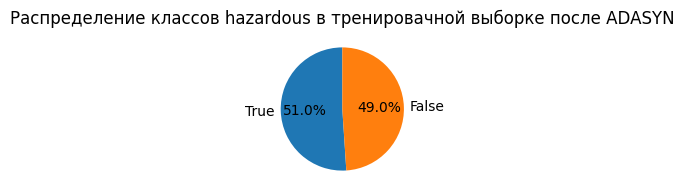

In [10]:
from imblearn.over_sampling import ADASYN

# Создание экземпляра ADASYN
ada = ADASYN()

# Применение ADASYN
X_resampled, y_resampled = ada.fit_resample(df_train.drop(columns=['hazardous']), df_train['hazardous'])

# Создание нового DataFrame
df_train_adasyn = pd.DataFrame(X_resampled)
df_train_adasyn['hazardous'] = y_resampled  # Добавление целевой переменной

# Вывод информации о новой выборке
print("Обучающая выборка после oversampling: ", df_train_adasyn.shape)
print(df_train_adasyn['hazardous'].value_counts())
hazardous_counts = df_train_adasyn['hazardous'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов hazardous в тренировачной выборке после ADASYN')
plt.show()

## Проведём балансировку методом андерсемплинга для уменьшения примеров большинства.

Обучающая выборка после undersampling:  (10608, 6)
hazardous
False    5304
True     5304
Name: count, dtype: int64


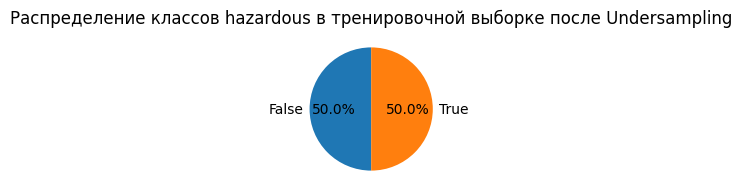

In [11]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()# Создание экземпляра RandomUnderSampler

# Применение RandomUnderSampler
X_resampled, y_resampled = rus.fit_resample(df_train.drop(columns=['hazardous']), df_train['hazardous'])

# Создание нового DataFrame
df_train_undersampled = pd.DataFrame(X_resampled)
df_train_undersampled['hazardous'] = y_resampled  # Добавление целевой переменной

# Вывод информации о новой выборке
print("Обучающая выборка после undersampling: ", df_train_undersampled.shape)
print(df_train_undersampled['hazardous'].value_counts())

# Визуализация распределения классов
hazardous_counts = df_train_undersampled['hazardous'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов hazardous в тренировочной выборке после Undersampling')
plt.show()

# Датасет 2. Indicators of Heart Disease
## По данным CDC, болезни сердца являются основной причиной смерти представителей большинства рас в США (афроамериканцев, американских индейцев и коренных жителей Аляски, а также белых). Около половины всех американцев (47%) имеют по крайней мере 1 из 3 основных факторов риска сердечно-сосудистых заболеваний: высокое кровяное давление, высокий уровень холестерина и курение. Другие ключевые показатели включают состояние диабета, ожирение (высокий ИМТ), недостаточную физическую активность или чрезмерное употребление алкоголя. Выявление и профилактика факторов, оказывающих наибольшее влияние на болезни сердца, очень важны в здравоохранении. В свою очередь, развитие вычислительной техники позволяет применять методы машинного обучения для обнаружения "закономерностей" в данных, которые могут предсказать состояние пациента.
## В данном датасете объектами исследования являются жители США. В нём содержатся данные атрибуты: HeartDisease, BMI, Smoking, AlcoholDrinking, Stroke, PhysicalHealth, MentalHealth, DiffWalking, Sex, AgeCategory, Race, Diabetic, PhysicalActivity, GenHealth, SleepTime, Asthma, KidneyDisease, SkinCancer. Цель создания данного датасета- научиться прогнозировать сердечный приступ.

In [40]:
import pandas as pd 
df = pd.read_csv("C://Users//annal//aim//static//csv//heart.csv")
print('количество колонок: ' + str(df.columns.size))  
print('колонки: ' + ', '.join(df.columns))

количество колонок: 18
колонки: HeartDisease, BMI, Smoking, AlcoholDrinking, Stroke, PhysicalHealth, MentalHealth, DiffWalking, Sex, AgeCategory, Race, Diabetic, PhysicalActivity, GenHealth, SleepTime, Asthma, KidneyDisease, SkinCancer


## Получим сведения о пропущенных данных. Из вывода видно, что пропущенные данные не обнаружены.

In [41]:
# Количество пустых значений признаков
print(df.isnull().sum())

print()

# Есть ли пустые значения признаков
print(df.isnull().any())

print()

# Процент пустых значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f"{i} процент пустых значений: %{null_rate:.2f}")

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

HeartDisease        False
BMI                 False
Smoking             False
AlcoholDrinking     False
Stroke              False
PhysicalHealth      False
MentalHealth        False
DiffWalking         False
Sex                 False
AgeCategory         False
Race                False
Diabetic            False
PhysicalActivity    False
GenHealth           False
SleepTime           False
Asthma              False
KidneyDisease       False
SkinCancer          False
dtype: bool



## При беглом осмотре данных, зашумлённости не обнаружила. Необходимо ознакомиться с данными о выбросах.

In [42]:
numeric_columns = ['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'SleepTime']
for column in numeric_columns:
    if pd.api.types.is_numeric_dtype(df[column]):  # Проверяем, является ли колонка числовой
        q1 = df[column].quantile(0.25)  # Находим 1-й квантиль (Q1)
        q3 = df[column].quantile(0.75)  # Находим 3-й квантиль (Q3)
        iqr = q3 - q1  # Вычисляем межквантильный размах (IQR)

        # Определяем границы для выбросов
        lower_bound = q1 - 1.5 * iqr  # Нижняя граница
        upper_bound = q3 + 1.5 * iqr  # Верхняя граница

        # Подсчитываем количество выбросов
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_count = outliers.shape[0]

        # Устраняем выбросы: заменяем значения ниже нижней границы на саму нижнюю границу, а выше верхней — на верхнюю
        df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

        print(f"Колонка {column}:")
        print(f"  Есть выбросы: {'Да' if outlier_count > 0 else 'Нет'}")
        print(f"  Количество выбросов: {outlier_count}")
        print(f"  Минимальное значение: {df[column].min()}")
        print(f"  Максимальное значение: {df[column].max()}")
        print(f"  1-й квантиль (Q1): {q1}")
        print(f"  3-й квантиль (Q3): {q3}\n")

Колонка BMI:
  Есть выбросы: Да
  Количество выбросов: 10396
  Минимальное значение: 12.945
  Максимальное значение: 42.505
  1-й квантиль (Q1): 24.03
  3-й квантиль (Q3): 31.42

Колонка PhysicalHealth:
  Есть выбросы: Да
  Количество выбросов: 47146
  Минимальное значение: 0.0
  Максимальное значение: 5.0
  1-й квантиль (Q1): 0.0
  3-й квантиль (Q3): 2.0

Колонка MentalHealth:
  Есть выбросы: Да
  Количество выбросов: 51576
  Минимальное значение: 0.0
  Максимальное значение: 7.5
  1-й квантиль (Q1): 0.0
  3-й квантиль (Q3): 3.0

Колонка SleepTime:
  Есть выбросы: Да
  Количество выбросов: 4543
  Минимальное значение: 3.0
  Максимальное значение: 11.0
  1-й квантиль (Q1): 6.0
  3-й квантиль (Q3): 8.0



## Необходимо построить диаграммы для поиска зависимостей сердечного приступа(HeartDisease ) от других колонок.

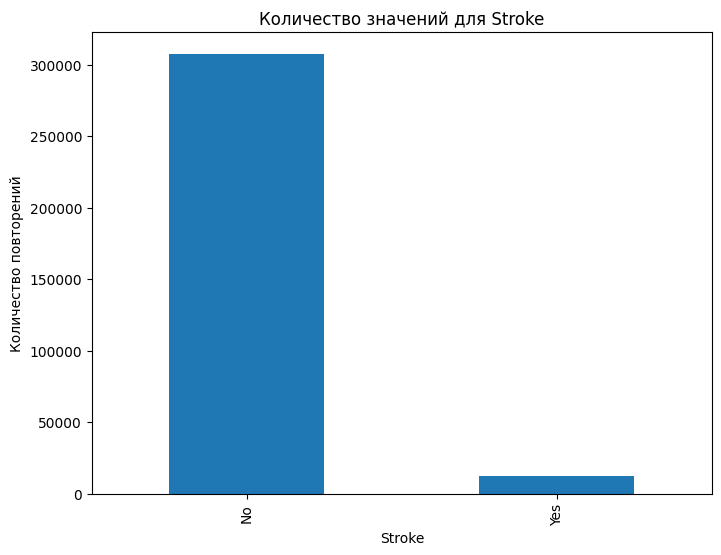

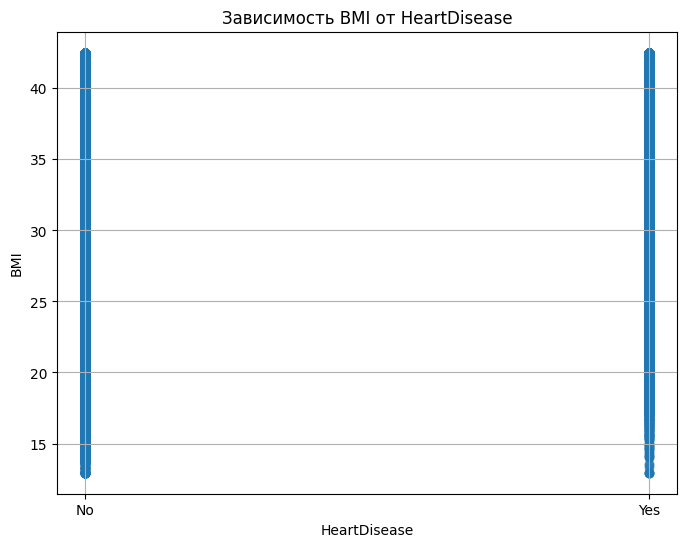

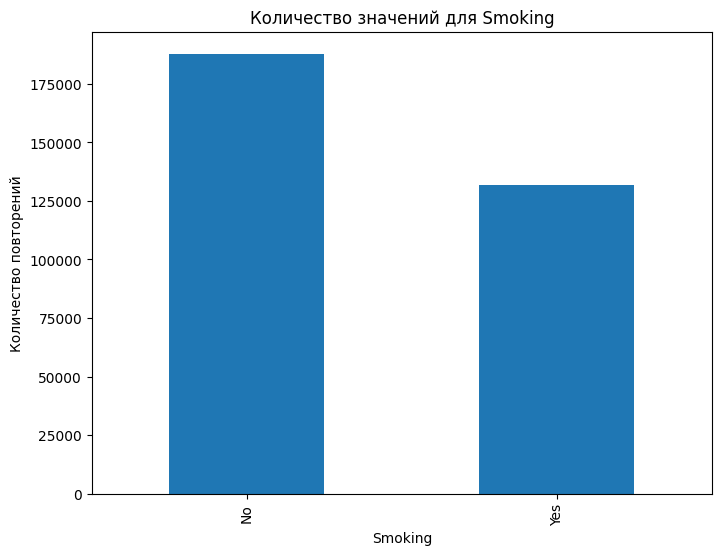

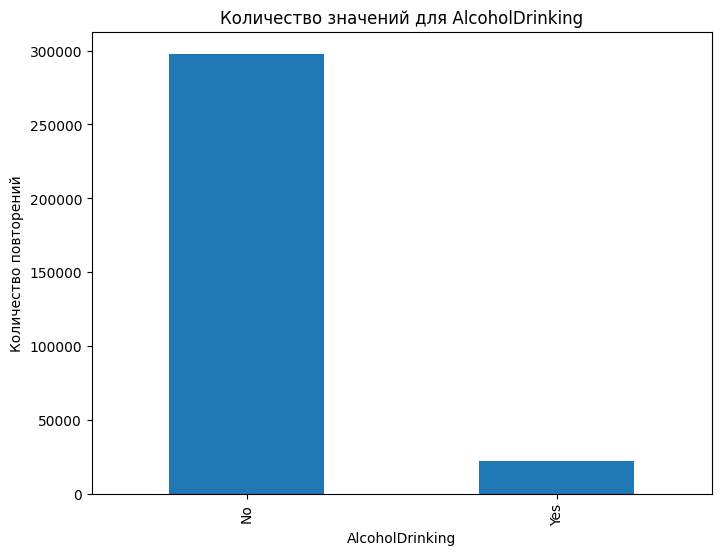

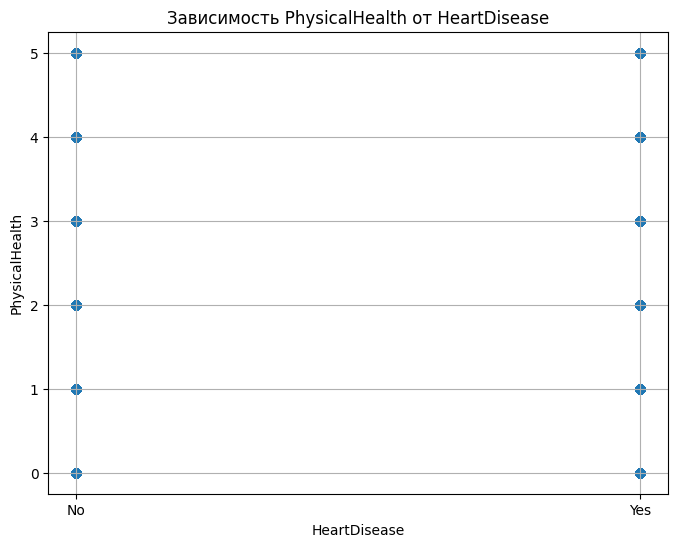

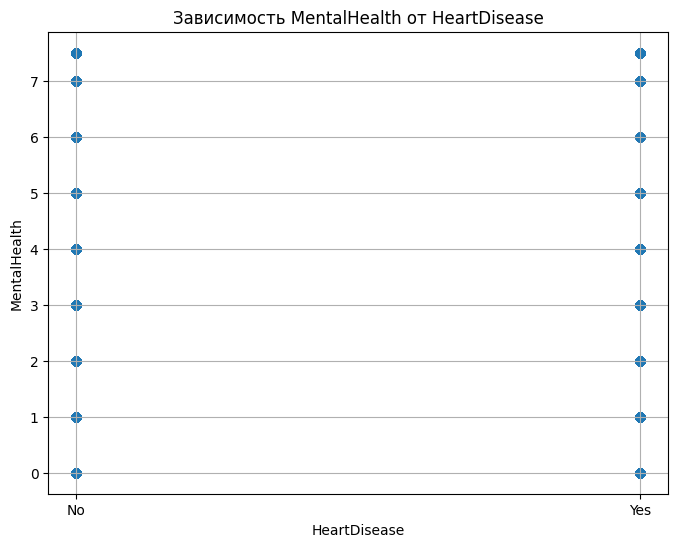

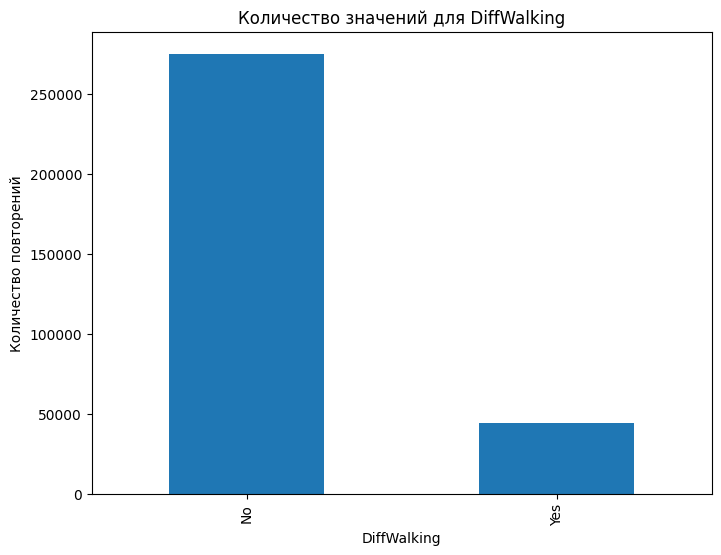

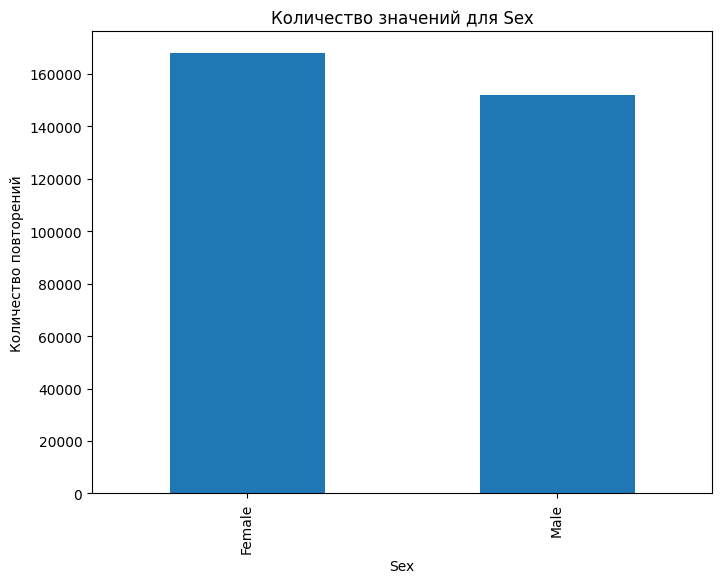

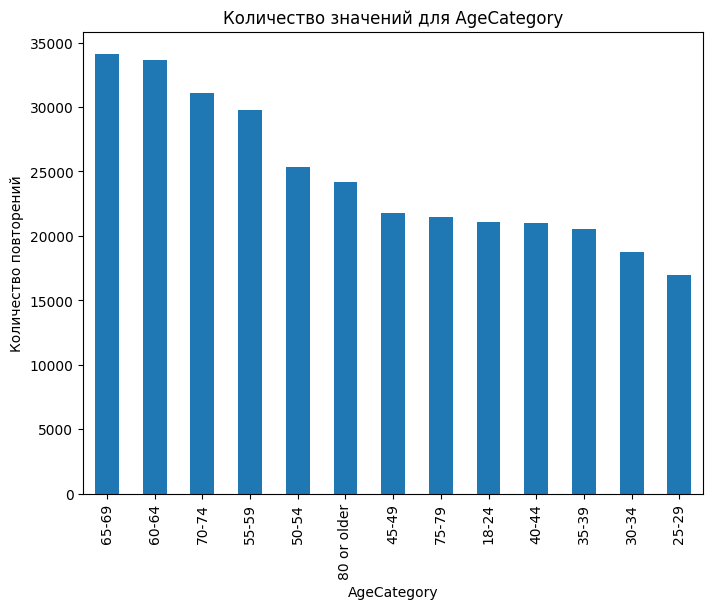

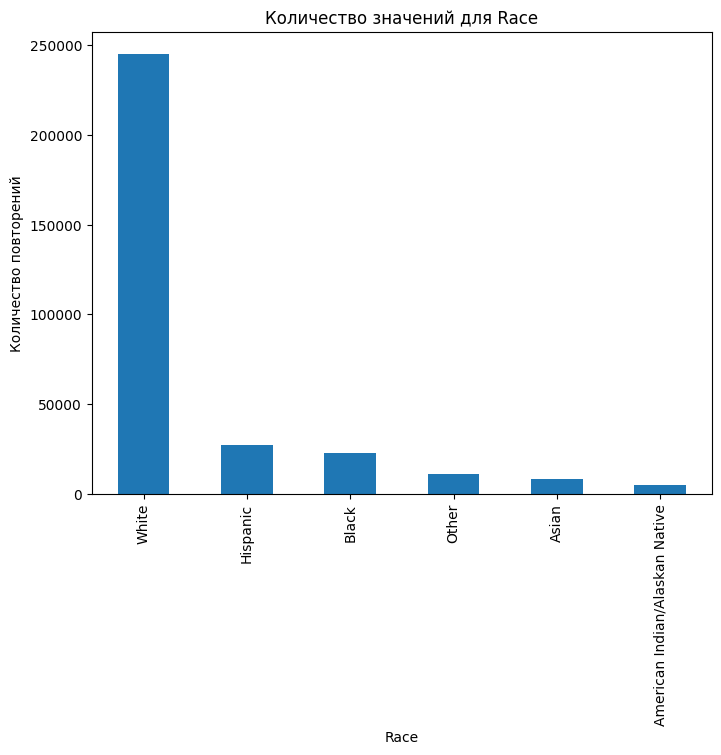

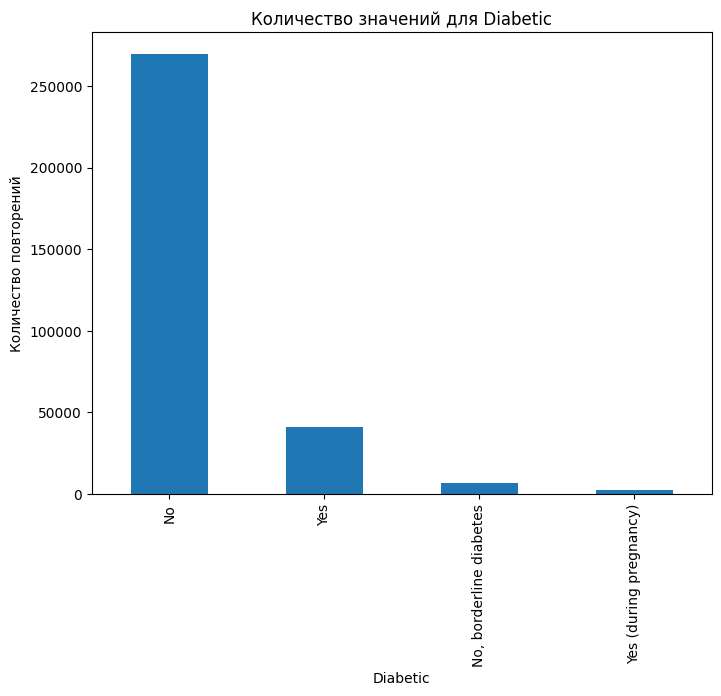

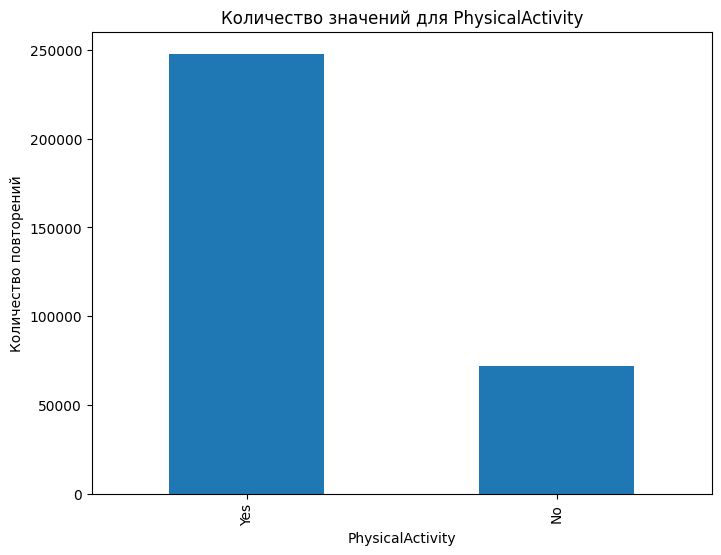

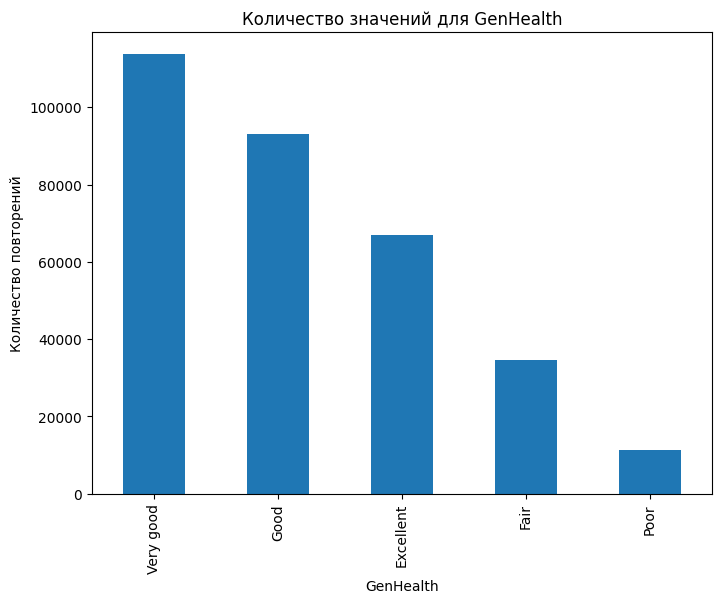

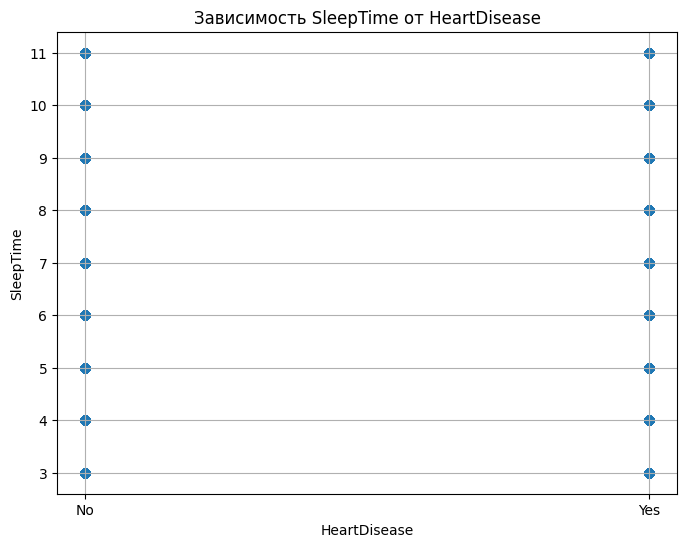

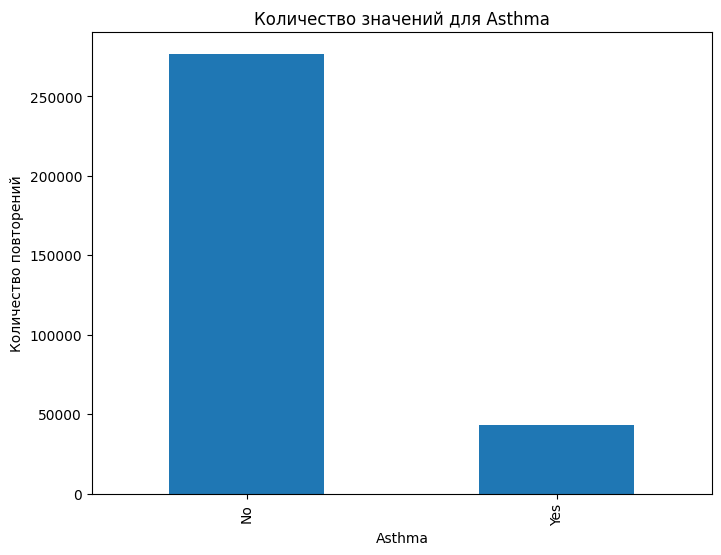

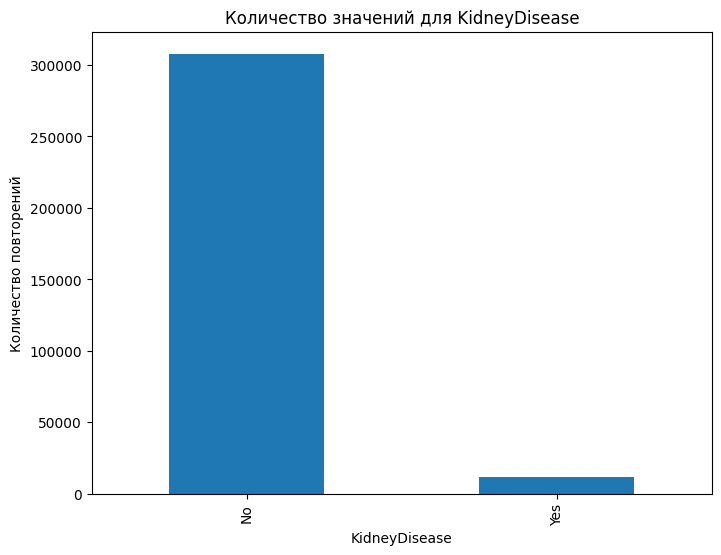

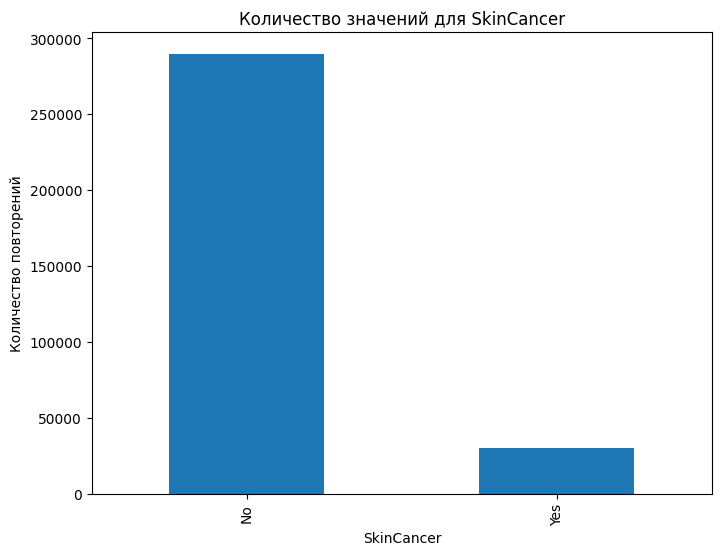

In [50]:
# Список колонок для построения графиков
columns = ['Stroke', 'BMI','Smoking', 'AlcoholDrinking', 'PhysicalHealth', 'MentalHealth','DiffWalking', 'Sex', 'AgeCategory',
            'Race','Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer' ]

# Создание диаграмм зависимости
for column in columns:
    plt.figure(figsize=(8, 6))  # Установка размера графика
    if pd.api.types.is_numeric_dtype(df[column]):  # Проверяем, является ли колонка числовой
        # Проверяем, содержит ли колонка только два уникальных значения (0 и 1)
        if df[column].nunique() == 2 and set(df[column].unique()).issubset({0, 1}):
            # Если да, то строим столбчатую диаграмму
            counts = df[column].value_counts()  # Считаем количество повторений каждого значения
            counts.plot(kind='bar')  # Создаем столбчатую диаграмму
            plt.title(f'Количество значений для {column}')
            plt.xlabel(column)
            plt.ylabel('Количество повторений')
        else:
            # Если колонка числовая, создаем диаграмму рассеяния
            plt.scatter(df['HeartDisease'], df[column], alpha=0.5)  # Создаем диаграмму рассеяния
            plt.title(f'Зависимость {column} от HeartDisease')
            plt.xlabel('HeartDisease')
            plt.ylabel(column)
            plt.xticks([0, 1])  # Установка меток по оси X
            plt.grid()  # Добавление сетки для удобства восприятия
    else:
        # Если колонка не числовая, строим столбчатую диаграмму
        counts = df[column].value_counts()  # Считаем количество повторений каждого значения
        counts.plot(kind='bar')  # Создаем столбчатую диаграмму
        plt.title(f'Количество значений для {column}')
        plt.xlabel(column)
        plt.ylabel('Количество повторений')

    plt.show()  # Отображение графика

## Далее создадим выборки. Разбивать данные на классы стоит по критерию сердечного приступа, потому что это то, что будет предсказывать модель.

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

Обучающая выборка:  (191877, 18)
HeartDisease
No     175453
Yes     16424
Name: count, dtype: int64


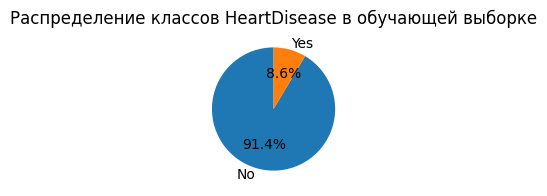

Контрольная выборка:  (63959, 18)
HeartDisease
No     58485
Yes     5474
Name: count, dtype: int64


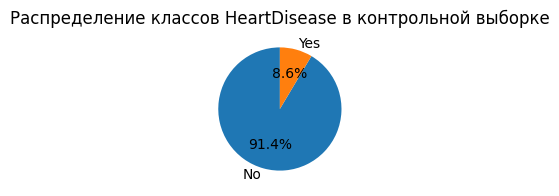

Тестовая выборка:  (63959, 18)
HeartDisease
No     58484
Yes     5475
Name: count, dtype: int64


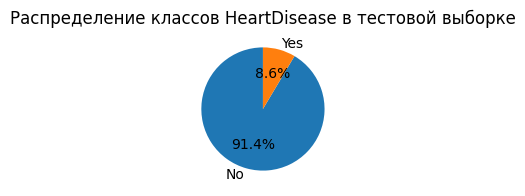

In [51]:
# Вывод распределения количества наблюдений по меткам (классам)
print(df.HeartDisease.value_counts())
print()

data = df.copy()

df_train, df_val, df_test = split_stratified_into_train_val_test(
   data, stratify_colname="HeartDisease", frac_train=0.60, frac_val=0.20, frac_test=0.20
)

print("Обучающая выборка: ", df_train.shape)
print(df_train.HeartDisease.value_counts())
counts = df_train['HeartDisease'].value_counts()
plt.figure(figsize=(2, 2))# Установка размера графика
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)# Построение круговой диаграммы
plt.title('Распределение классов HeartDisease в обучающей выборке')# Добавление заголовка
plt.show()# Отображение графика

print("Контрольная выборка: ", df_val.shape)
print(df_val.HeartDisease.value_counts())
counts = df_val['HeartDisease'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов HeartDisease в контрольной выборке')
plt.show()

print("Тестовая выборка: ", df_test.shape)
print(df_test.HeartDisease.value_counts())
counts = df_test['HeartDisease'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов HeartDisease в тестовой выборке')
plt.show()

## По диаграммам видно, что выборка плохая, слишком большое смещение классов. Проведём аугментацию данных оверсемплингом. Этот метод позволяет увеличить количество примеров меньшинства.

Обучающая выборка после oversampling:  (351819, 51)
HeartDisease
Yes    176366
No     175453
Name: count, dtype: int64


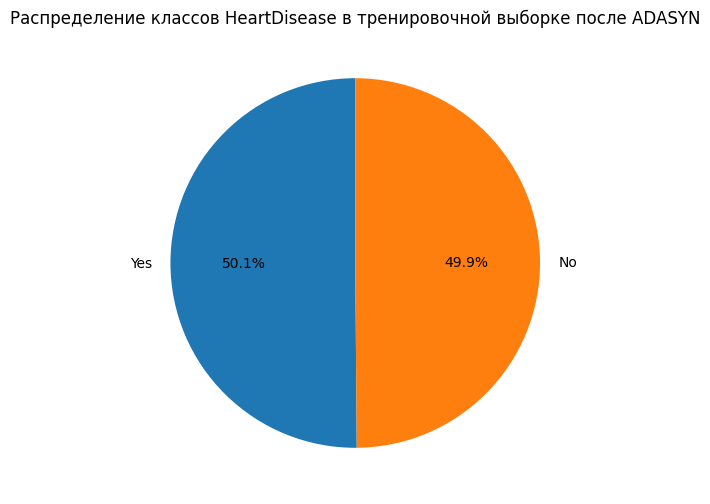

In [52]:
from imblearn.over_sampling import ADASYN
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['Stroke','Smoking', 'AlcoholDrinking', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
                         'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']  # Ваши категориальные признаки
numeric_features = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']  # Ваши числовые признаки

# Создание пайплайна для обработки категориальных данных
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),  # OneHotEncoder для категориальных данных
        ('num', 'passthrough', numeric_features)  # Оставляем числовые колонки без изменений
    ]
)

# Создание экземпляра ADASYN
ada = ADASYN()

# Преобразование данных с помощью пайплайна
X = preprocessor.fit_transform(df_train.drop(columns=['HeartDisease']))
y = df_train['HeartDisease']

# Применение ADASYN
X_resampled, y_resampled = ada.fit_resample(X, y)

# Создание нового DataFrame
df_train_adasyn = pd.DataFrame(X_resampled)
# Восстанавливаем названия столбцов для DataFrame
ohe_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
new_column_names = list(ohe_columns) + numeric_features
df_train_adasyn.columns = new_column_names

# Добавление целевой переменной
df_train_adasyn['HeartDisease'] = y_resampled

# Вывод информации о новой выборке
print("Обучающая выборка после oversampling: ", df_train_adasyn.shape)
print(df_train_adasyn['HeartDisease'].value_counts())

# Визуализация
counts = df_train_adasyn['HeartDisease'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов HeartDisease в тренировочной выборке после ADASYN')
plt.show()

## Проведём балансировку методом андерсемплинга для уменьшения примеров большинства.

Обучающая выборка после undersampling:  (32848, 18)
HeartDisease
No     16424
Yes    16424
Name: count, dtype: int64


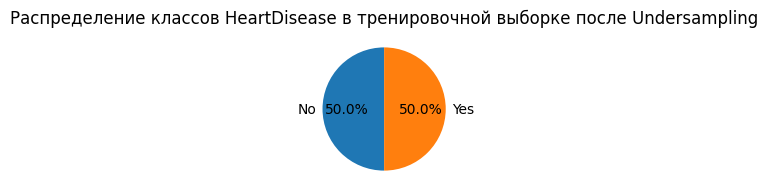

In [53]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()# Создание экземпляра RandomUnderSampler

# Применение RandomUnderSampler
X_resampled, y_resampled = rus.fit_resample(df_train.drop(columns=['HeartDisease']), df_train['HeartDisease'])

# Создание нового DataFrame
df_train_undersampled = pd.DataFrame(X_resampled)
df_train_undersampled['HeartDisease'] = y_resampled  # Добавление целевой переменной

# Вывод информации о новой выборке
print("Обучающая выборка после undersampling: ", df_train_undersampled.shape)
print(df_train_undersampled['HeartDisease'].value_counts())

# Визуализация распределения классов
counts = df_train_undersampled['HeartDisease'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов HeartDisease в тренировочной выборке после Undersampling')
plt.show()

# Датасет 3. Stroke Prediction Dataset
## По данным Всемирной организации здравоохранения (ВОЗ), инсульт является второй по значимости причиной смерти в мире, на его долю приходится примерно 11% от общего числа смертей.Этот набор данных используется для прогнозирования вероятности инсульта у пациента на основе входных параметров, таких как пол, возраст, различные заболевания и статус курения. Каждая строка в данных предоставляет актуальную информацию о пациенте.
## В данном датасете объектами исследования являются пациенты. В нём содержатся данные атрибуты: id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke. Цель создания данного датасета- научиться прогнозировать инсульт.

In [56]:
import pandas as pd 
df = pd.read_csv("C://Users//annal//aim//static//csv//healthcare-dataset-stroke-data.csv")
print('количество колонок: ' + str(df.columns.size))  
print('колонки: ' + ', '.join(df.columns))

количество колонок: 12
колонки: id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke


## Получим сведения о пропущенных данных. Из вывода видно, что пропущенные данные есть в столбце bmi.

In [57]:
# Количество пустых значений признаков
print(df.isnull().sum())

print()

# Есть ли пустые значения признаков
print(df.isnull().any())

print()

# Процент пустых значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f"{i} процент пустых значений: %{null_rate:.2f}")

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

bmi процент пустых значений: %3.93


## Необходимо заполнить пропуски данными.

In [58]:
# Замена пустых данных на медиану
df["bmi"] = df["bmi"].fillna(df["bmi"].median())

In [59]:
# Количество пустых значений признаков
print(df.isnull().sum())

print()

# Есть ли пустые значения признаков
print(df.isnull().any())

print()

# Процент пустых значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f"{i} процент пустых значений: %{null_rate:.2f}")

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool



## Далее необходимо ознакомиться с выбросами и усреднить их.

In [60]:
numeric_columns = ['age', 'avg_glucose_level', 'bmi']
for column in numeric_columns:
    if pd.api.types.is_numeric_dtype(df[column]):  # Проверяем, является ли колонка числовой
        q1 = df[column].quantile(0.25)  # Находим 1-й квантиль (Q1)
        q3 = df[column].quantile(0.75)  # Находим 3-й квантиль (Q3)
        iqr = q3 - q1  # Вычисляем межквантильный размах (IQR)

        # Определяем границы для выбросов
        lower_bound = q1 - 1.5 * iqr  # Нижняя граница
        upper_bound = q3 + 1.5 * iqr  # Верхняя граница

        # Подсчитываем количество выбросов
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_count = outliers.shape[0]
        
        # Устраняем выбросы: заменяем значения ниже нижней границы на саму нижнюю границу, а выше верхней — на верхнюю
        df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

        print(f"Колонка {column}:")
        print(f"  Есть выбросы: {'Да' if outlier_count > 0 else 'Нет'}")
        print(f"  Количество выбросов: {outlier_count}")
        print(f"  Минимальное значение: {df[column].min()}")
        print(f"  Максимальное значение: {df[column].max()}")
        print(f"  1-й квантиль (Q1): {q1}")
        print(f"  3-й квантиль (Q3): {q3}\n")

Колонка age:
  Есть выбросы: Нет
  Количество выбросов: 0
  Минимальное значение: 0.08
  Максимальное значение: 82.0
  1-й квантиль (Q1): 25.0
  3-й квантиль (Q3): 61.0

Колонка avg_glucose_level:
  Есть выбросы: Да
  Количество выбросов: 627
  Минимальное значение: 55.12
  Максимальное значение: 169.35750000000002
  1-й квантиль (Q1): 77.245
  3-й квантиль (Q3): 114.09

Колонка bmi:
  Есть выбросы: Да
  Количество выбросов: 126
  Минимальное значение: 10.300000000000006
  Максимальное значение: 46.29999999999999
  1-й квантиль (Q1): 23.8
  3-й квантиль (Q3): 32.8



## Необходимо построить диаграммы для поиска зависимостей инсульта(stroke ) от других колонок.

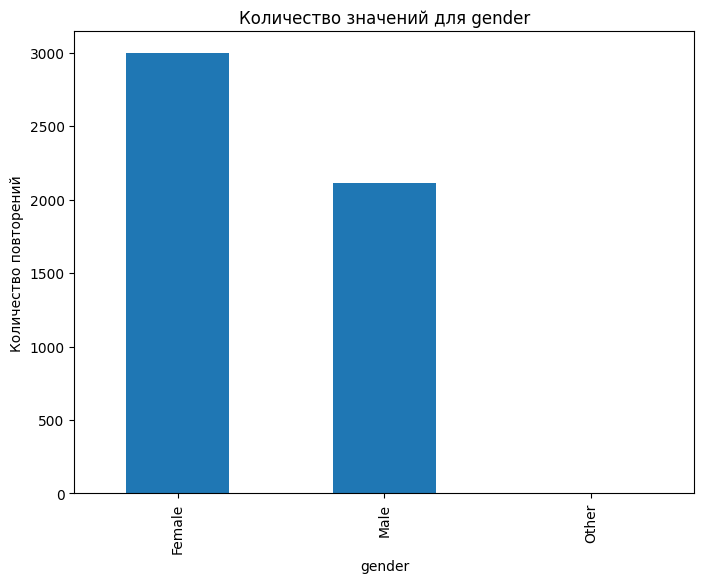

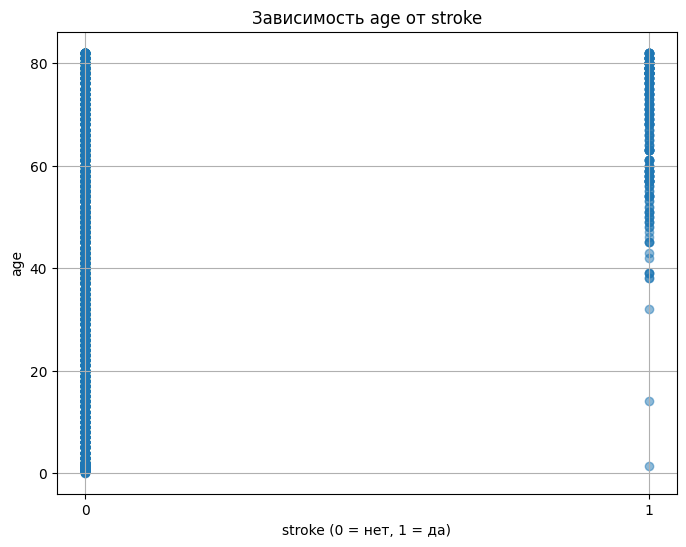

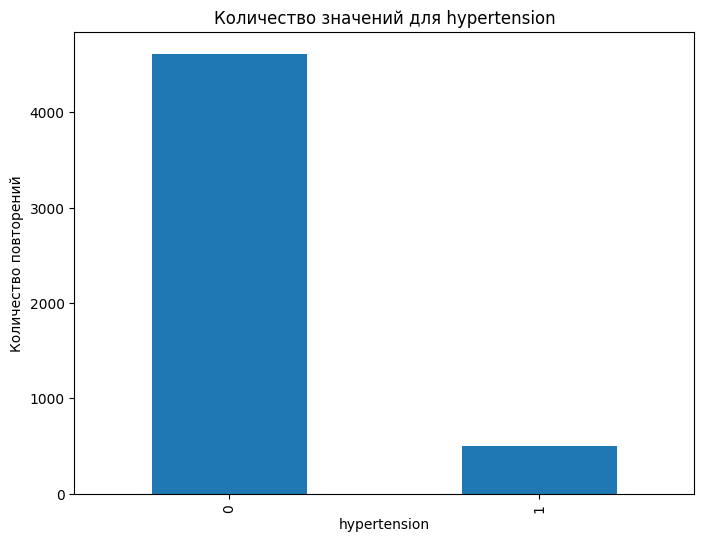

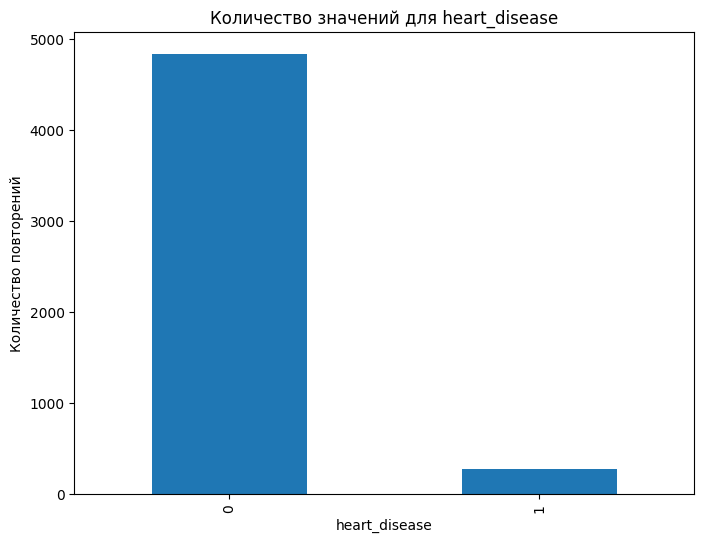

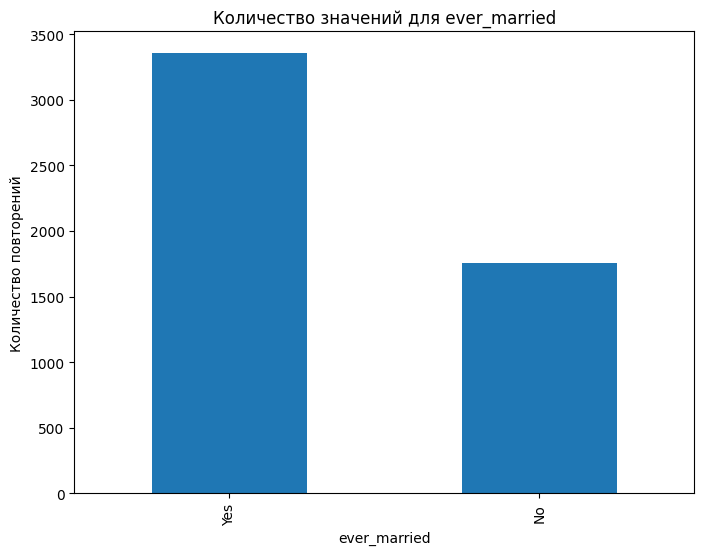

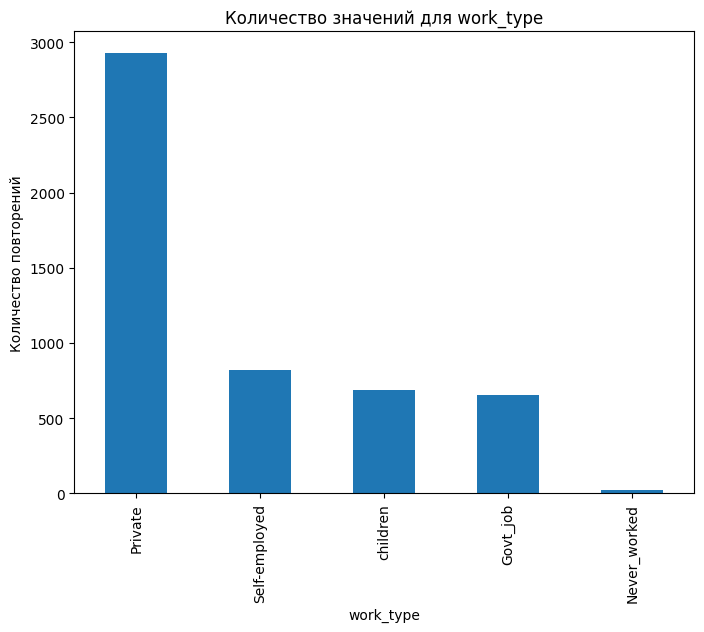

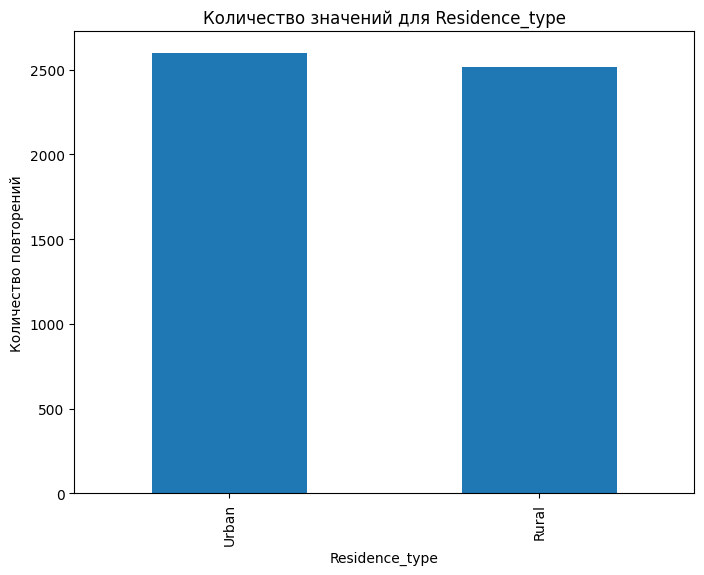

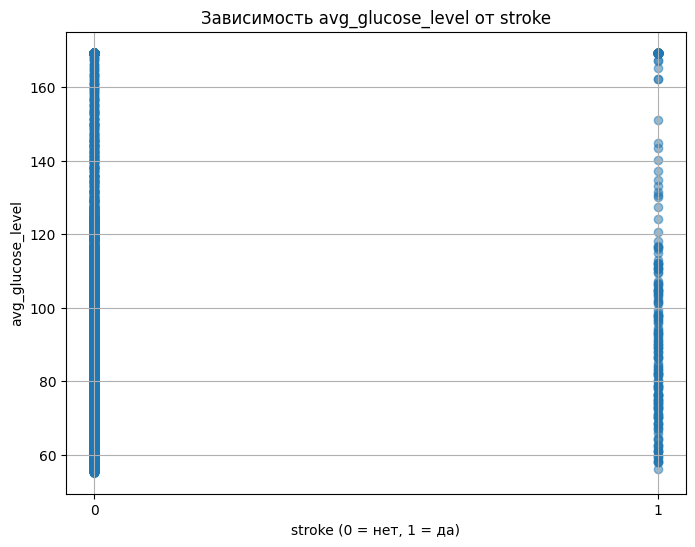

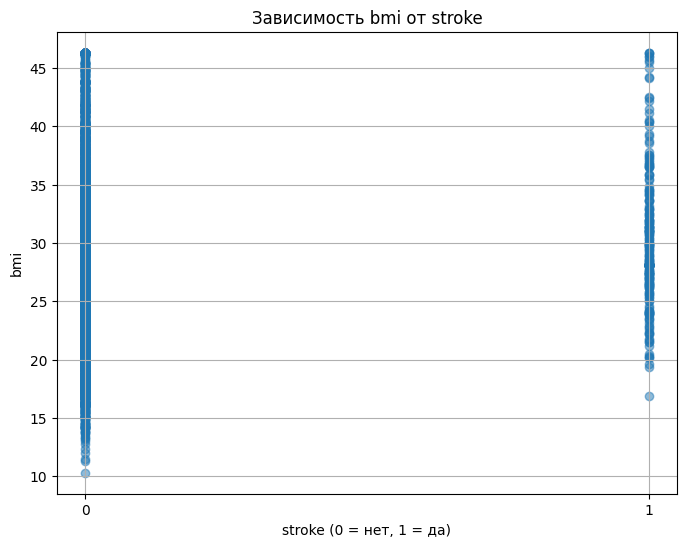

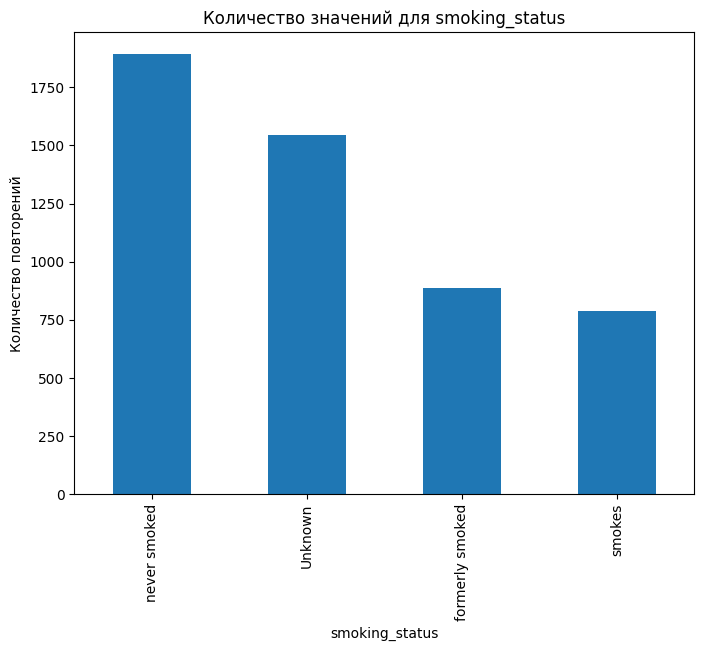

In [61]:
# Список колонок для построения графиков
columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
           'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
           'smoking_status']

# Создание диаграмм зависимости
for column in columns:
    plt.figure(figsize=(8, 6))  # Установка размера графика
    if pd.api.types.is_numeric_dtype(df[column]):  # Проверяем, является ли колонка числовой
        # Проверяем, содержит ли колонка только два уникальных значения (0 и 1)
        if df[column].nunique() == 2 and set(df[column].unique()).issubset({0, 1}):
            # Если да, то строим столбчатую диаграмму
            counts = df[column].value_counts()  # Считаем количество повторений каждого значения
            counts.plot(kind='bar')  # Создаем столбчатую диаграмму
            plt.title(f'Количество значений для {column}')
            plt.xlabel(column)
            plt.ylabel('Количество повторений')
        else:
            # Если колонка числовая, создаем диаграмму рассеяния
            plt.scatter(df['stroke'], df[column], alpha=0.5)  # Создаем диаграмму рассеяния
            plt.title(f'Зависимость {column} от stroke')
            plt.xlabel('stroke (0 = нет, 1 = да)')
            plt.ylabel(column)
            plt.xticks([0, 1])  # Установка меток по оси X
            plt.grid()  # Добавление сетки для удобства восприятия
    else:
        # Если колонка не числовая, строим столбчатую диаграмму
        counts = df[column].value_counts()  # Считаем количество повторений каждого значения
        counts.plot(kind='bar')  # Создаем столбчатую диаграмму
        plt.title(f'Количество значений для {column}')
        plt.xlabel(column)
        plt.ylabel('Количество повторений')

    plt.show()  # Отображение графика

## Далее создадим выборки. Разбивать данные на классы стоит по критерию инсульта, потому что это то, что будет предсказывать модель.

stroke
0    4861
1     249
Name: count, dtype: int64

Обучающая выборка:  (3066, 12)
stroke
0    2917
1     149
Name: count, dtype: int64


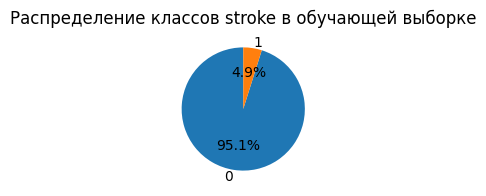

Контрольная выборка:  (1022, 12)
stroke
0    972
1     50
Name: count, dtype: int64


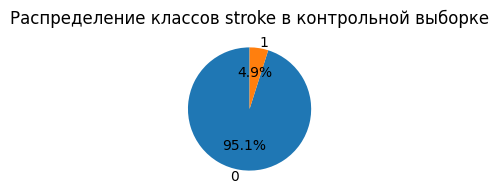

Тестовая выборка:  (1022, 12)
stroke
0    972
1     50
Name: count, dtype: int64


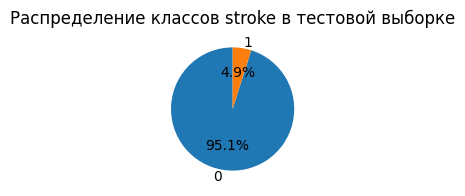

In [62]:
# Вывод распределения количества наблюдений по меткам (классам)
print(df.stroke.value_counts())
print()

data = df.copy()

df_train, df_val, df_test = split_stratified_into_train_val_test(
   data, stratify_colname="stroke", frac_train=0.60, frac_val=0.20, frac_test=0.20
)

print("Обучающая выборка: ", df_train.shape)
print(df_train.stroke.value_counts())
counts = df_train['stroke'].value_counts()
plt.figure(figsize=(2, 2))# Установка размера графика
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)# Построение круговой диаграммы
plt.title('Распределение классов stroke в обучающей выборке')# Добавление заголовка
plt.show()# Отображение графика

print("Контрольная выборка: ", df_val.shape)
print(df_val.stroke.value_counts())
counts = df_val['stroke'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов stroke в контрольной выборке')
plt.show()

print("Тестовая выборка: ", df_test.shape)
print(df_test.stroke.value_counts())
counts = df_test['stroke'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов stroke в тестовой выборке')
plt.show()

## По диаграммам видно, что выборка плохая, слишком большое смещение классов. Проведём аугментацию данных оверсемплингом. Этот метод позволяет увеличить количество примеров меньшинства.

Обучающая выборка после oversampling:  (5807, 18)
stroke
0    2917
1    2890
Name: count, dtype: int64


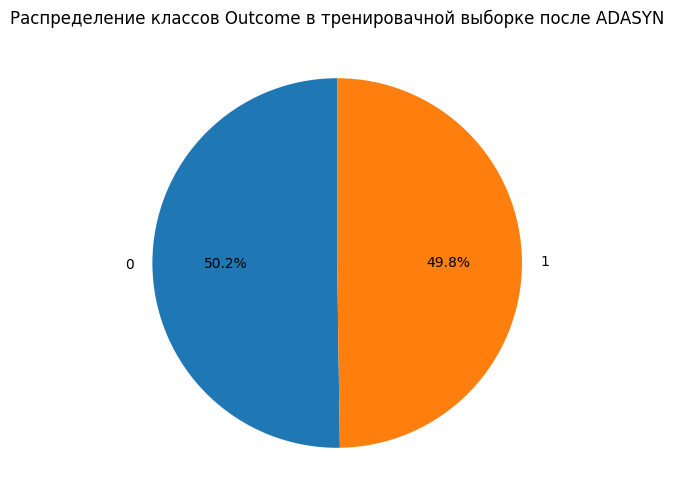

In [63]:
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type']  # Ваши категориальные признаки
numeric_features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']  # Ваши числовые признаки

# Создание пайплайна для обработки категориальных данных
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),  # OneHotEncoder для категориальных данных
        ('num', 'passthrough', numeric_features)  # Оставляем числовые колонки без изменений
    ]
)

# Создание экземпляра ADASYN
ada = ADASYN()

# Преобразование данных с помощью пайплайна
X = preprocessor.fit_transform(df_train.drop(columns=['stroke']))
y = df_train['stroke']

# Применение ADASYN
X_resampled, y_resampled = ada.fit_resample(X, y)

# Создание нового DataFrame
df_train_adasyn = pd.DataFrame(X_resampled)
# Восстанавливаем названия столбцов для DataFrame
ohe_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
new_column_names = list(ohe_columns) + numeric_features
df_train_adasyn.columns = new_column_names

# Добавление целевой переменной
df_train_adasyn['stroke'] = y_resampled

# Вывод информации о новой выборке
print("Обучающая выборка после oversampling: ", df_train_adasyn.shape)
print(df_train_adasyn['stroke'].value_counts())

# Визуализация
counts = df_train_adasyn['stroke'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов Outcome в тренировачной выборке после ADASYN')
plt.show()

## Проведём балансировку методом андерсемплинга для уменьшения примеров большинства.

Обучающая выборка после undersampling:  (298, 12)
stroke
0    149
1    149
Name: count, dtype: int64


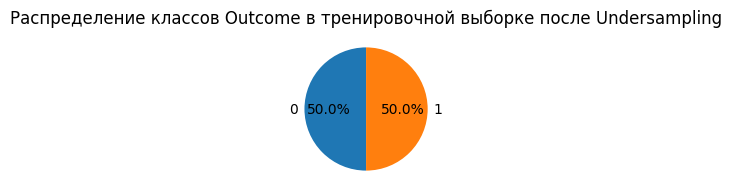

In [64]:
# Применение RandomUnderSampler
X_resampled, y_resampled = rus.fit_resample(df_train.drop(columns=['stroke']), df_train['stroke'])

# Создание нового DataFrame
df_train_undersampled = pd.DataFrame(X_resampled)
df_train_undersampled['stroke'] = y_resampled  # Добавление целевой переменной

# Вывод информации о новой выборке
print("Обучающая выборка после undersampling: ", df_train_undersampled.shape)
print(df_train_undersampled['stroke'].value_counts())

# Визуализация распределения классов
counts = df_train_undersampled['stroke'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов Outcome в тренировочной выборке после Undersampling')
plt.show()